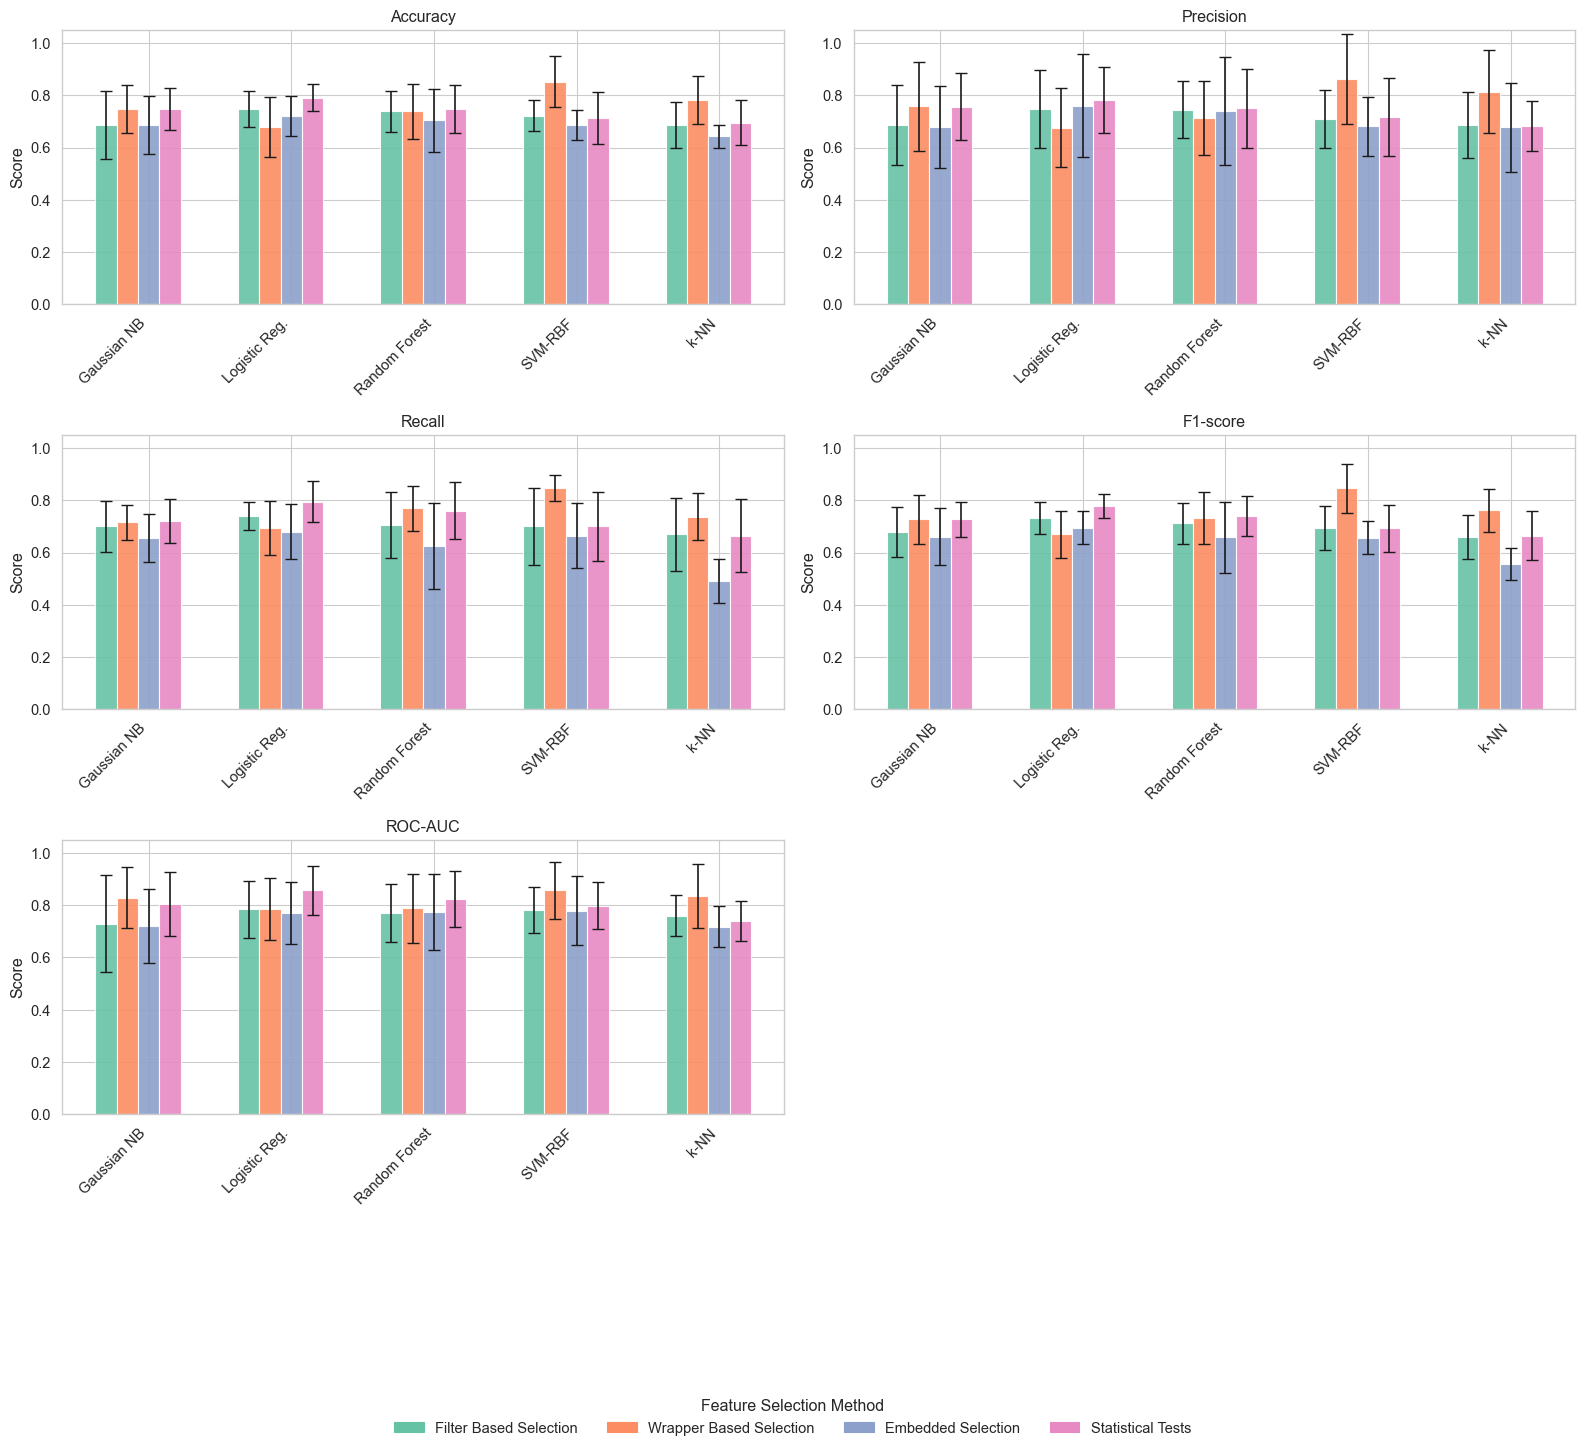

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import matplotlib

# ─────────────────────────────────────────────
# 0. Global Style Settings (Updated Font Sizes)
# ─────────────────────────────────────────────
matplotlib.rcParams.update({
    'font.size': 16,            # Base font
    'axes.titlesize': 18,       # Subplot title
    'axes.labelsize': 16,       # Axis labels
    'xtick.labelsize': 14,      # Tick labels
    'ytick.labelsize': 14,
    'legend.fontsize': 14,      # Legend labels
    'legend.title_fontsize': 16,
    'font.family': 'DejaVu Sans'
})

# ─────────────────────────────────────────────
# 1. File locations
# ─────────────────────────────────────────────
files = {
    "Filter Based Selection"      : r"D:\Research\Journal Papers\Springer\Results\New_2\1.Filter_Anoda.xlsx",
    "Wrapper Based Selection"     : r"D:\Research\Journal Papers\Springer\Results\New_2\2.SFS.xlsx",
    "Embedded Selection"          : r"D:\Research\Journal Papers\Springer\Results\New_2\3.Embeded.xlsx",
    "Statistical Tests"           : r"D:\Research\Journal Papers\Springer\Results\New_2\4.Weltch.xlsx",
}

output_path = r"D:\Research\Journal Papers\Springer\Results\New_2\Feature_Selection_Comparison_Manuscript.png"

# ─────────────────────────────────────────────
# 2. Robust “mean ± SD” parser
# ─────────────────────────────────────────────
pm_regex = re.compile(r"""(?P<mean>[+-]?\d*\.?\d+)\s*(?:±|\+/-|\+\/-|\(±|\()\s*(?P<sd>[+-]?\d*\.?\d+)?""", re.VERBOSE)

def parse_value(val):
    if pd.isna(val): return None, None
    if isinstance(val, (int, float)): return float(val), 0.0
    if isinstance(val, str):
        m = pm_regex.search(val)
        if m:
            mean = float(m.group("mean"))
            sd = float(m.group("sd")) if m.group("sd") else 0.0
            return mean, sd
    return None, None

# ─────────────────────────────────────────────
# 3. Load and process Excel files
# ─────────────────────────────────────────────
records = []
for method_name, path in files.items():
    if not Path(path).exists():
        raise FileNotFoundError(f"Can't find: {path}")
    df = pd.read_excel(path)
    df.columns = df.columns.str.strip()
    for _, row in df.iterrows():
        model = str(row["Model"]).strip()
        for metric in ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]:
            mean, sd = parse_value(row[metric])
            records.append({
                "Method": method_name,
                "Model": model,
                "Metric": metric,
                "Mean": mean,
                "SD": sd
            })

metrics_df = pd.DataFrame(records).dropna(subset=["Mean"])

# ─────────────────────────────────────────────
# 4. Plotting
# ─────────────────────────────────────────────
sns.set(style="whitegrid", context="paper", font_scale=1.2)

custom_palette = {
    "Filter Based Selection"   : "#66c2a5",
    "Wrapper Based Selection"  : "#fc8d62",
    "Embedded Selection"       : "#8da0cb",
    "Statistical Tests"        : "#e78ac3",
}

method_order = list(files.keys())
metrics = metrics_df["Metric"].unique()
n_metrics = len(metrics)

fig, axes = plt.subplots((n_metrics + 1) // 2, 2, figsize=(16, 14), squeeze=False)
axes = axes.flatten()

bar_w = 0.15
offset = {m: (i - 2) * bar_w for i, m in enumerate(method_order)}

for ax, metric in zip(axes, metrics):
    mdf = metrics_df[metrics_df["Metric"] == metric]
    mean_piv = mdf.pivot(index="Model", columns="Method", values="Mean").reindex(method_order, axis=1)
    sd_piv = mdf.pivot(index="Model", columns="Method", values="SD").reindex(method_order, axis=1)

    x_labels = mean_piv.index.tolist()
    x_pos = range(len(x_labels))

    for m in method_order:
        ax.bar(
            [x + offset[m] for x in x_pos],
            mean_piv[m].values,
            yerr=sd_piv[m].values,
            capsize=4,
            width=bar_w,
            label=m,
            color=custom_palette[m],
            alpha=0.9
        )

    ax.set_title(metric)
    ax.set_xticks(list(x_pos))
    ax.set_xticklabels(x_labels, rotation=45, ha="right")
    ax.set_ylabel("Score")
    ax.set_ylim(0, 1.05)

# ─────────────────────────────────────────────
# 5. Final Adjustments and Save
# ─────────────────────────────────────────────
for extra_ax in axes[len(metrics):]:
    extra_ax.set_visible(False)

fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=custom_palette[m]) for m in method_order],
    labels=method_order,
    title="Feature Selection Method",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.08),
    ncol=4,
    frameon=False
)

plt.tight_layout(rect=[0, 0.08, 1, 0.96])
plt.savefig(output_path, dpi=600, bbox_inches="tight", transparent=False)
plt.show()


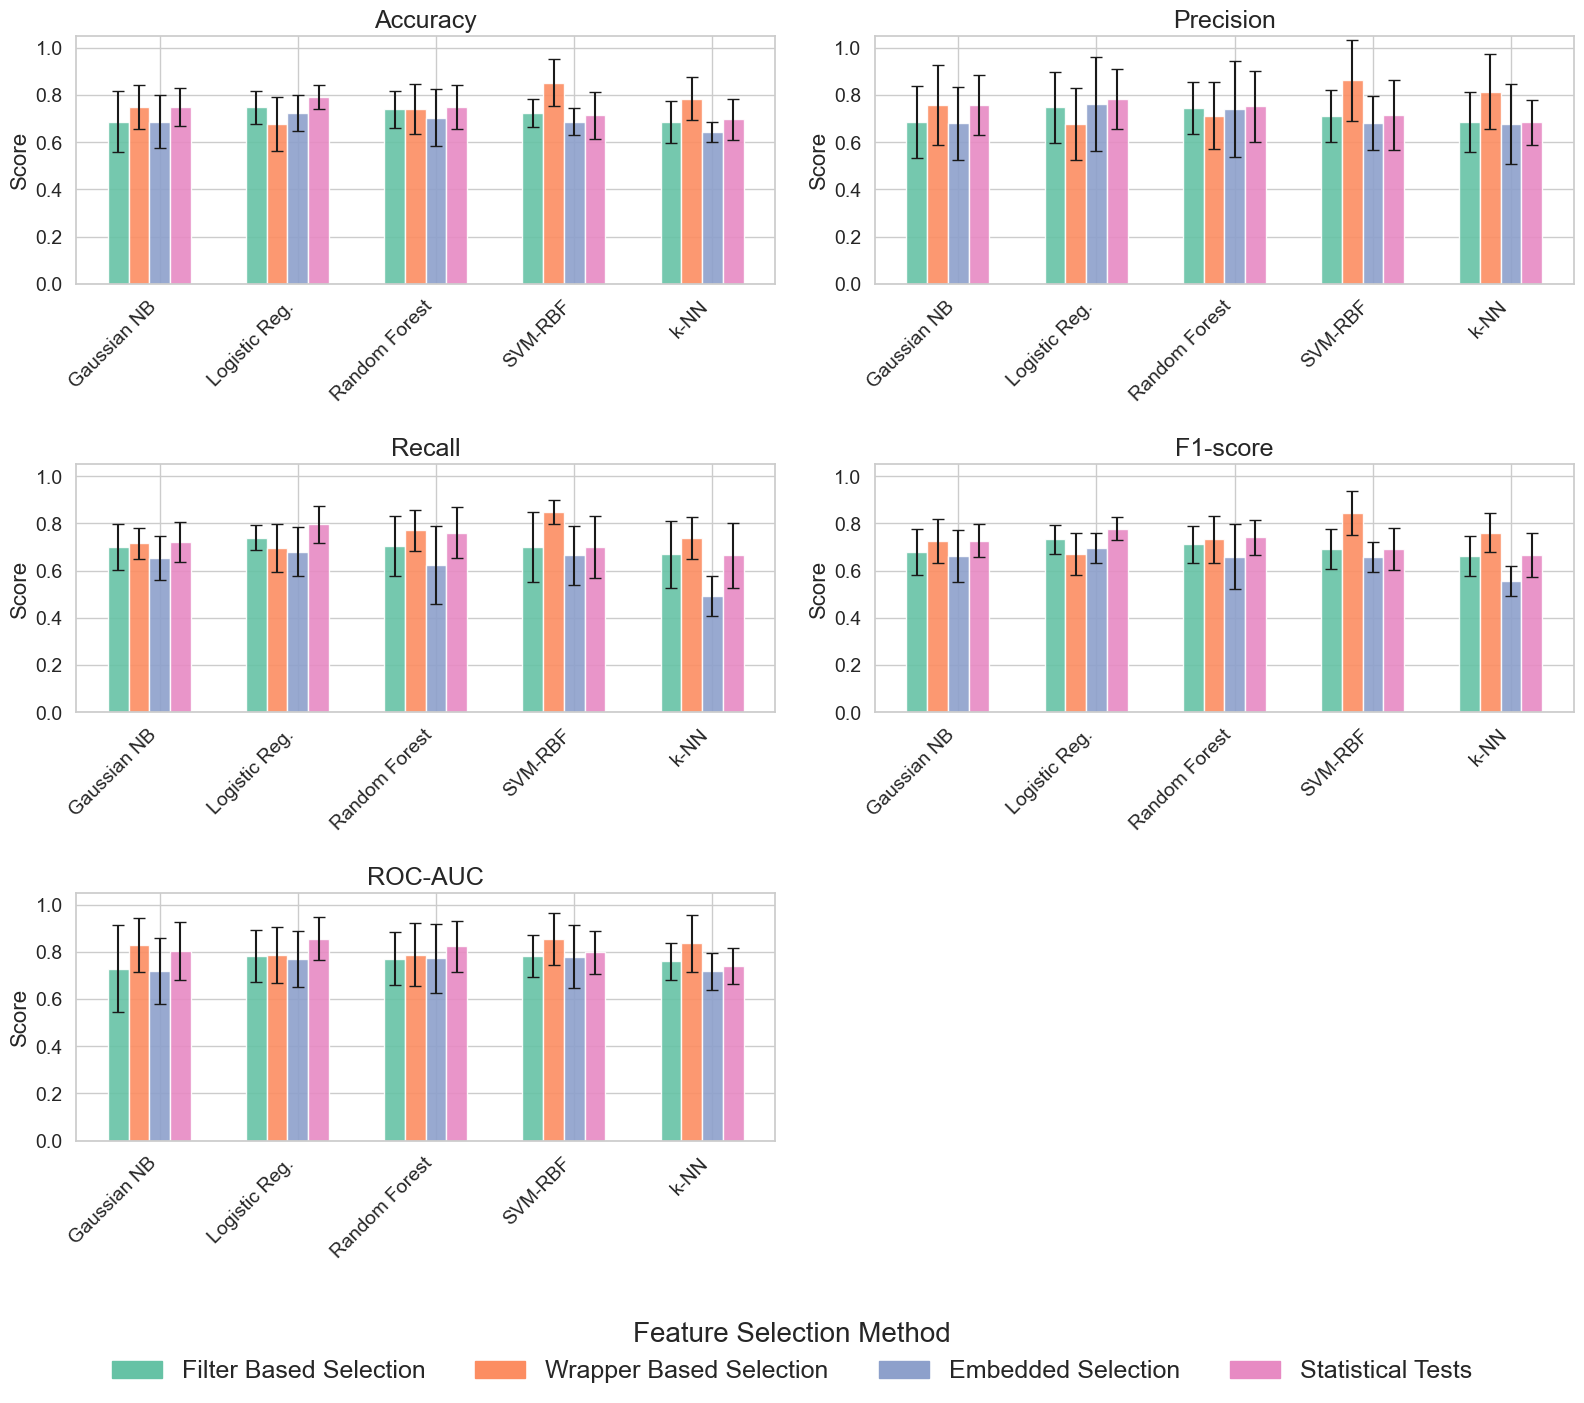

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import matplotlib

# ─────────────────────────────────────────────
# 0. Global Style Settings (Updated Font Sizes)
# ─────────────────────────────────────────────
matplotlib.rcParams.update({
    'font.size': 16,              # Base font
    'axes.titlesize': 18,         # Subplot title
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14,
    'legend.fontsize': 18,        # Legend label font size (⬅️ Increased)
    'legend.title_fontsize': 20,  # Legend title font size (⬅️ Increased)
    'font.family': 'DejaVu Sans'
})

# ─────────────────────────────────────────────
# 1. File locations
# ─────────────────────────────────────────────
files = {
    "Filter Based Selection"      : r"D:\Research\Journal Papers\Springer\Results\New_2\1.Filter_Anoda.xlsx",
    "Wrapper Based Selection"     : r"D:\Research\Journal Papers\Springer\Results\New_2\2.SFS.xlsx",
    "Embedded Selection"          : r"D:\Research\Journal Papers\Springer\Results\New_2\3.Embeded.xlsx",
    "Statistical Tests"           : r"D:\Research\Journal Papers\Springer\Results\New_2\4.Weltch.xlsx",
}

output_path = r"D:\Research\Journal Papers\Springer\Results\New_2\Feature_Selection_Comparison_Manuscript.png"

# ─────────────────────────────────────────────
# 2. Robust “mean ± SD” parser
# ─────────────────────────────────────────────
pm_regex = re.compile(r"""(?P<mean>[+-]?\d*\.?\d+)\s*(?:±|\+/-|\+\/-|\(±|\()\s*(?P<sd>[+-]?\d*\.?\d+)?""", re.VERBOSE)

def parse_value(val):
    if pd.isna(val): return None, None
    if isinstance(val, (int, float)): return float(val), 0.0
    if isinstance(val, str):
        m = pm_regex.search(val)
        if m:
            mean = float(m.group("mean"))
            sd = float(m.group("sd")) if m.group("sd") else 0.0
            return mean, sd
    return None, None

# ─────────────────────────────────────────────
# 3. Load and process Excel files
# ─────────────────────────────────────────────
records = []
for method_name, path in files.items():
    if not Path(path).exists():
        raise FileNotFoundError(f"Can't find: {path}")
    df = pd.read_excel(path)
    df.columns = df.columns.str.strip()
    for _, row in df.iterrows():
        model = str(row["Model"]).strip()
        for metric in ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]:
            mean, sd = parse_value(row[metric])
            records.append({
                "Method": method_name,
                "Model": model,
                "Metric": metric,
                "Mean": mean,
                "SD": sd
            })

metrics_df = pd.DataFrame(records).dropna(subset=["Mean"])

# ─────────────────────────────────────────────
# 4. Plotting
# ─────────────────────────────────────────────
sns.set(style="whitegrid", context="notebook")

custom_palette = {
    "Filter Based Selection"   : "#66c2a5",
    "Wrapper Based Selection"  : "#fc8d62",
    "Embedded Selection"       : "#8da0cb",
    "Statistical Tests"        : "#e78ac3",
}

method_order = list(files.keys())
metrics = metrics_df["Metric"].unique()
n_metrics = len(metrics)

fig, axes = plt.subplots((n_metrics + 1) // 2, 2, figsize=(16, 14), squeeze=False)
axes = axes.flatten()

bar_w = 0.15
offset = {m: (i - 2) * bar_w for i, m in enumerate(method_order)}

for ax, metric in zip(axes, metrics):
    mdf = metrics_df[metrics_df["Metric"] == metric]
    mean_piv = mdf.pivot(index="Model", columns="Method", values="Mean").reindex(method_order, axis=1)
    sd_piv = mdf.pivot(index="Model", columns="Method", values="SD").reindex(method_order, axis=1)

    x_labels = mean_piv.index.tolist()
    x_pos = range(len(x_labels))

    for m in method_order:
        ax.bar(
            [x + offset[m] for x in x_pos],
            mean_piv[m].values,
            yerr=sd_piv[m].values,
            capsize=4,
            width=bar_w,
            label=m,
            color=custom_palette[m],
            alpha=0.9
        )

    ax.set_title(metric, fontsize=18)
    ax.set_ylabel("Score", fontsize=16)
    ax.set_xticks(list(x_pos))
    ax.set_xticklabels(x_labels, rotation=45, ha="right")
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(0, 1.05)

# ─────────────────────────────────────────────
# 5. Final Adjustments and Save
# ─────────────────────────────────────────────
for extra_ax in axes[len(metrics):]:
    extra_ax.set_visible(False)

fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=custom_palette[m]) for m in method_order],
    labels=method_order,
    title="Feature Selection Method",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.04),  # ⬅️ Reduced footer space
    ncol=4,
    frameon=False,
    fontsize=18,                 # ⬅️ Increased legend text
    title_fontsize=20           # ⬅️ Increased legend title
)

plt.tight_layout(rect=[0, 0.05, 1, 0.97], h_pad=2.0, w_pad=2.0)  # ⬅️ Tighter layout
plt.savefig(output_path, dpi=600, bbox_inches="tight", transparent=False)
plt.show()
